In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [12]:
df=pd.read_csv('..\shrit\Downloads\cancer.csv')

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df.drop(['id', 'Unnamed: 32'], axis = 1,inplace=True)

In [15]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
ctypes ={'M' : 1, 'B' : 0} 
df['diagnosis'] = df['diagnosis'].map(ctypes)

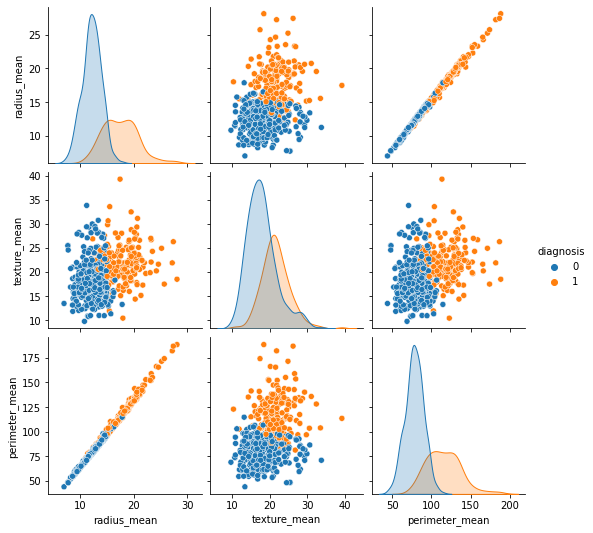

In [17]:
sns.pairplot(df,vars=['radius_mean','texture_mean','perimeter_mean'],hue='diagnosis')

In [18]:
X = np.array(df.iloc[:,1:])
y = np.array(df['diagnosis'])

In [19]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [20]:
from sklearn.model_selection import cross_val_score
nbrs = []
cv_scores = []
for k in range(1,40):
   nbrs.append(k)
   knn = KNeighborsClassifier(n_neighbors = k)
   scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'accuracy')
   cv_scores.append(scores.mean())
print(cv_scores)

[0.8948043184885289, 0.9106612685560055, 0.9027665317139002, 0.9080296896086371, 0.9080296896086371, 0.9053981106612685, 0.9079622132253711, 0.8974358974358975, 0.9000674763832659, 0.9026990553306342, 0.9053306342780028, 0.9053306342780028, 0.9105937921727396, 0.9053306342780028, 0.9053306342780028, 0.9053306342780028, 0.9026990553306342, 0.9053306342780028, 0.9026990553306342, 0.9053306342780028, 0.9053306342780028, 0.9053306342780028, 0.9053306342780028, 0.9026990553306342, 0.9026990553306342, 0.9027665317139002, 0.9027665317139002, 0.8975033738191633, 0.9026990553306342, 0.9000674763832659, 0.9026990553306342, 0.9053306342780028, 0.9026990553306342, 0.8975033738191632, 0.9026990553306342, 0.9001349527665317, 0.9026990553306342, 0.9001349527665317, 0.8975033738191632]


In [21]:
#Misclassification error
MSE = [1-x for x in cv_scores]

#Optimal value of k, with least MSE
optimal_k = nbrs[MSE.index(min(MSE))]
print('The optimal value of K (neighbors) is %d ' %optimal_k)

The optimal value of K (neighbors) is 2 


Text(0, 0.5, 'Mean Error')

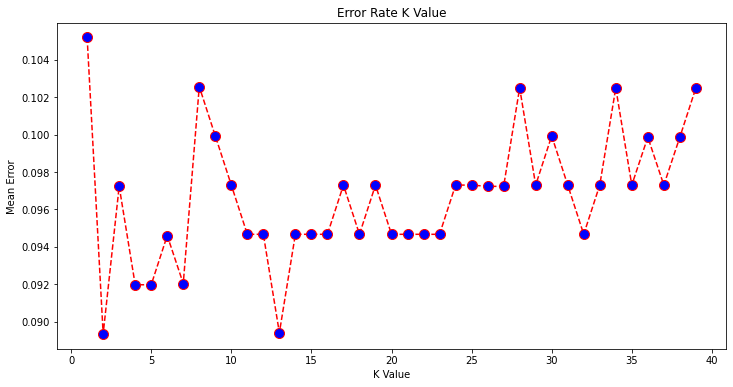

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), MSE, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [28]:
#Creating the Model with selected optimal value
knn = KNeighborsClassifier(n_neighbors = 2, p=2, metric = 'manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [29]:
y_pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy Score of the Model: {acc}')

Accuracy Score of the Model: 0.9521276595744681


In [31]:
print('Confusion Matrix :\n')
print(confusion_matrix(y_test,y_pred))
print(f'\nClassification Report \n\n {classification_report(y_test,y_pred)}')

Confusion Matrix :

[[120   1]
 [  8  59]]

Classification Report 

               precision    recall  f1-score   support

           0       0.94      0.99      0.96       121
           1       0.98      0.88      0.93        67

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



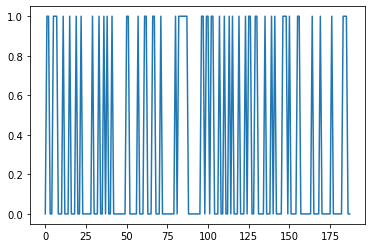

In [44]:
plt.plot(y_pred)

In [40]:
y_actual

NameError: name 'y_actual' is not defined

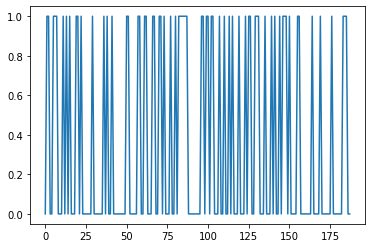

In [43]:
plt.plot(y_test)

In [49]:
sns.plot(df,vars=['y_pred'],hue='diagnosis')

AttributeError: module 'seaborn' has no attribute 'plot'